# Pre-processing IdahoAllocation data for WaDE upload.
- Purpose:  To pre-process the data into one main file for simple DataFrame creation and extraction

In [1]:
# Needed Libraries / Modules

# ---- working with data ----
import os  # native operating system interaction
import numpy as np  # mathematical array manipulation
import pandas as pd  # data structure and data analysis
import geopandas as gpd  # geo-data structure and data analysis

# ---- visualization ----
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # plotting library

# ---- API data retrieval ----
import requests  # http requests
import json  # JSON parse

# ---- Cleanup ----
import re  # string regular expression manipulation
from datetime import datetime  # date and time manipulation
pd.set_option('display.max_columns', 999)  # How to display all columns of a Pandas DataFrame in Jupyter Notebook
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation in Pandas

In [2]:
# Working Directory
workingDir = "G:/Shared drives/WaDE Data/WaDE Data Folder/Idaho/WaterAllocation"
os.chdir(workingDir)

## Point of Diversion Data

In [3]:
# Input File
FI_POD = "RawInputData/shapefiles/Water_Right_PODs.zip"
dfinPOD = gpd.read_file(FI_POD).replace(np.nan, "")
dfinPOD = dfinPOD.drop(['geometry'], axis=1) # don't want geometry for POD sites.

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfinPOD:
    dfinPOD['WaDEUUID'] = "idD" + dfinPOD.index.astype(str)
    dfinPOD.to_csv('RawInputData/Water_Right_PODs.zip', compression=dict(method='zip', archive_name='Water_Right_PODs.csv'), index=False)

print(len(dfinPOD))
dfinPOD.head(1)

265829


,OBJECTID,WaterRight,BasinNumbe,SequenceNu,SplitSuffi,VersionNum,Status,Basis,PriorityDa,Owner,OverallMax,Source,SourceQual,TributaryO,Tributar_1,WaterDistr,DiversionN,DataSource,MetalTagNu,DiversionT,RightID,PointOfDiv,WRReport,WRDocs,WRMap,SpatialDat,TrustOrNon,Uses,Latitude,Longitude,OverallM_1,WaDEUUID
0,1,63-10824,63,10824,,0,Active,License,1989-06-21,MAURICE MC CLUE,0.19000,GROUND WATER,,,,TBD,,QQ,,,22,16,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,482579,,"IRRIGATION, DOMESTIC",43.69087,-116.41621,68.10000,idD0


In [4]:
# create output POD dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfinPOD['WaDEUUID']

# Method Info
df['in_MethodUUID'] = "IDwr_M1"

# Variable Info
df['in_VariableSpecificUUID'] = "IDwr_V1"

# Organization Info
df['in_OrganizationUUID'] = "IDwr_O1"

# WaterSource Info
df['in_Geometry'] = ""
df['in_GNISFeatureNameCV'] = ""
df['in_WaterQualityIndicatorCV'] = ""
df['in_WaterSourceName'] = dfinPOD['Source'].replace(np.nan, "").astype(str).astype(str).str.title()
df['in_WaterSourceNativeID'] = ""
df['in_WaterSourceTypeCV'] = "" # autfo fill in below

# Site Info
df['in_CoordinateAccuracy'] = ""
df['in_CoordinateMethodCV'] = dfinPOD['DataSource']
df['in_County'] = ""
df['in_EPSGCodeCV'] = "4326"
df['in_GNISCodeCV'] = ""
df['in_HUC12'] = ""
df['in_HUC8'] = ""
df['in_Latitude'] = dfinPOD['Latitude']
df['in_Longitude'] = dfinPOD['Longitude']
df['in_NHDNetworkStatusCV'] = ""
df['in_NHDProductCV'] = ""
df['in_PODorPOUSite'] = "POD"
df['in_SiteName'] = dfinPOD['DiversionN']
df['in_SiteNativeID'] = "POD" + dfinPOD['PointOfDiv'].replace("", 0).fillna(0).astype(int).astype(str)
df['in_SitePoint'] = ""
df['in_SiteTypeCV'] = ""
df['in_StateCV'] = "ID"
df['in_USGSSiteID'] = ""
df['in_Geometry'] = ""

# AllocationAmount Info
df['in_AllocationApplicationDate'] = ""
df['in_AllocationAssociatedConsumptiveUseSiteIDs'] = ""
df['in_AllocationAssociatedWithdrawalSiteIDs'] = ""
df['in_AllocationBasisCV'] = dfinPOD['Basis']
df['in_AllocationChangeApplicationIndicator'] = ""
df['in_AllocationCommunityWaterSupplySystem'] = ""
df['in_AllocationCropDutyAmount'] = ""
df['in_AllocationExpirationDate'] = ""
df['in_AllocationFlow_CFS'] = dfinPOD['OverallMax'].astype(float)
df['in_AllocationLegalStatusCV'] = dfinPOD['Status']
df['in_AllocationNativeID'] =  dfinPOD['WaterRight'].replace("", 0).fillna(0).astype(str)
df['in_AllocationOwner'] = dfinPOD['Owner']
df['in_AllocationPriorityDate'] = dfinPOD['PriorityDa']
df['in_AllocationSDWISIdentifierCV'] = ""
df['in_AllocationTimeframeEnd'] = ""
df['in_AllocationTimeframeStart'] = ""
df['in_AllocationTypeCV'] = ""
df['in_AllocationVolume_AF'] = dfinPOD['OverallM_1'].astype(float)
df['in_BeneficialUseCategory'] = dfinPOD['Uses']
df['in_CommunityWaterSupplySystem'] = ""
df['in_CropTypeCV'] = ""
df['in_CustomerTypeCV'] = ""
df['in_DataPublicationDate'] = ""
df['in_DataPublicationDOI'] = ""
df['in_ExemptOfVolumeFlowPriority'] = 0
df['in_GeneratedPowerCapacityMW'] = ""
df['in_IrrigatedAcreage'] = ""
df['in_IrrigationMethodCV'] = ""
df['in_LegacyAllocationIDs'] = ""
df['in_OwnerClassificationCV'] = ""
df['in_PopulationServed'] = ""
df['in_PowerType'] = ""
df['in_PrimaryBeneficialUseCategory'] = ""
df['in_SDWISIdentifierCV'] = ""
df['in_WaterAllocationNativeURL'] = dfinPOD['WRReport']

outPOD = df.copy()
outPOD = outPOD.drop_duplicates().reset_index(drop=True).replace(np.nan, '')
print(len(outPOD))
outPOD.head()

265829


,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_OrganizationUUID,in_Geometry,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_EPSGCodeCV,in_GNISCodeCV,in_HUC12,in_HUC8,in_Latitude,in_Longitude,in_NHDNetworkStatusCV,in_NHDProductCV,in_PODorPOUSite,in_SiteName,in_SiteNativeID,in_SitePoint,in_SiteTypeCV,in_StateCV,in_USGSSiteID,in_AllocationApplicationDate,in_AllocationAssociatedConsumptiveUseSiteIDs,in_AllocationAssociatedWithdrawalSiteIDs,in_AllocationBasisCV,in_AllocationChangeApplicationIndicator,in_AllocationCommunityWaterSupplySystem,in_AllocationCropDutyAmount,in_AllocationExpirationDate,in_AllocationFlow_CFS,in_AllocationLegalStatusCV,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationSDWISIdentifierCV,in_AllocationTimeframeEnd,in_AllocationTimeframeStart,in_AllocationTypeCV,in_AllocationVolume_AF,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_ExemptOfVolumeFlowPriority,in_GeneratedPowerCapacityMW,in_IrrigatedAcreage,in_IrrigationMethodCV,in_LegacyAllocationIDs,in_OwnerClassificationCV,in_PopulationServed,in_PowerType,in_PrimaryBeneficialUseCategory,in_SDWISIdentifierCV,in_WaterAllocationNativeURL
0,idD0,IDwr_M1,IDwr_V1,IDwr_O1,,,,Ground Water,,,,QQ,,4326,,,,43.69087,-116.41621,,,POD,,POD16,,,ID,,,,,License,,,,,0.19000,Active,63-10824,MAURICE MC CLUE,1989-06-21,,,,,68.10000,"IRRIGATION, DOMESTIC",,,,,,0,,,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...
1,idD1,IDwr_M1,IDwr_V1,IDwr_O1,,,,Spring,,,,QQ,,4326,,,,44.25431,-116.49047,,,POD,,POD122,,,ID,,,,,License,,,,,0.05000,Active,67-7744,UNITED STATES OF AMERICA ACTING THROUGH,1992-05-27,,,,,1.60000,"STOCKWATER, WILDLIFE",,,,,,0,,,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...
2,idD2,IDwr_M1,IDwr_V1,IDwr_O1,,,,Ground Water,,,,QQ,,4326,,,,43.61613,-116.87410,,,POD,,POD160,,,ID,,,,,License,,,,,0.13000,Active,63-11206,JAMES P MERTZ,1990-02-28,,,,,1.30000,COMMERCIAL,,,,,,0,,,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...
3,idD3,IDwr_M1,IDwr_V1,IDwr_O1,,,,Ground Water,,,,GPS - Downloaded,,4326,,,,42.76173,-114.79149,,,POD,,POD185,,,ID,,,,,License,,,,,1.20000,Active,36-8313A,SOUTHFIELD LAND & LIVESTOCK LLC,1986-08-20,,,,,240.00000,IRRIGATION,,,,,,0,,,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...
4,idD4,IDwr_M1,IDwr_V1,IDwr_O1,,,,Ground Water,,,,GPS - Downloaded,,4326,,,,42.76016,-114.79147,,,POD,,POD186,,,ID,,,,,License,,,,,1.20000,Active,36-8313A,SOUTHFIELD LAND & LIVESTOCK LLC,1986-08-20,,,,,240.00000,IRRIGATION,,,,,,0,,,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...


## Place of Use Data

In [5]:
# Input File - place of use data
FI_POU = "RawInputData/shapefiles/WaterRightPOUs.zip"
dfinPOU = gpd.read_file(FI_POU).replace(np.nan, "")
dfinPOU['geometry'] = dfinPOU['geometry'].to_crs(epsg=4326) # Realign Geometry Projection

# WaDE UUID tracker for data assessment
if 'WaDEUUID' not in dfinPOU:
    dfinPOU['WaDEUUID'] = "idU" + dfinPOU.index.astype(str)
    dfinPOU.to_csv('RawInputData/WaterRightPOUs.zip', compression=dict(method='zip', archive_name='WaterRightPOUs.csv'), index=False)

print(len(dfinPOU))
dfinPOU.head()

217143


,WaterRight,BasinNumbe,SequenceNu,SplitSuffi,Status,PriorityDa,DecreedDat,Owner,WaterUse,WaterUseCo,TotalAcres,AcreLimit,Source,SourceQual,TributaryO,Tributar_1,WaterDistr,LargePOU,RightID,PlaceOfUse,WRReport,WRDocs,WRMap,TrustOrNon,cent_Latit,cent_Longi,SHAPE_STAr,SHAPE_STLe,Shape_Leng,Shape_Area,geometry,WaDEUUID
0,33-10900,33,10900,,Active,1934-06-28,2001-10-11,UNITED STATES OF AMERICA ACTING THROUGH,STOCKWATER,04,0.00000,0.00000,LITTLE LOST RIVER,,SINKS,,33,0,222600,2,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,,43.98140,-113.16982,8321866.53210,54110.17968,0.55442,0.00093,"MULTIPOLYGON (((-113.09907 43.88546, -113.0940...",idU0
1,57-10609,57,10609,,Active,1941-07-01,1996-11-15,LACHELLE WOOD,STOCKWATER,04,0.00000,0.00000,GROUND WATER,,,,NWD,0,361130,7,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,,43.51844,-116.91302,160610.05400,1603.13059,0.01714,0.00002,"POLYGON ((-116.91055 43.52022, -116.91051 43.5...",idU1
2,63-30274,63,30274,,Active,1988-08-31,2000-05-26,MARY ANN HOFMANN,DOMESTIC,43,0.00000,0.00000,GROUND WATER,,,,TBD,0,376520,9,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,,43.58281,-116.17519,651.78070,103.72826,0.00114,0.00000,"POLYGON ((-116.175 43.58271, -116.17537 43.582...",idU2
3,36-12737,36,12737,,Active,1958-12-31,1998-05-19,HERBERT W POTEET,DOMESTIC,43,0.00000,0.00000,GROUND WATER,,,,EXC,0,362295,12,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,,42.73658,-113.51396,161398.92655,1607.19430,0.01705,0.00002,"POLYGON ((-113.5115 42.73474, -113.51641 42.73...",idU3
4,36-12736,36,12736,,Active,1958-12-31,1998-03-20,HERBERT W POTEET,DOMESTIC,43,0.00000,0.00000,GROUND WATER,,,,EXC,0,362294,15,https://research.idwr.idaho.gov/apps/shared/Wr...,https://research.idwr.idaho.gov/apps/Shared/Lf...,https://maps.idwr.idaho.gov/apps/Shared/PrintM...,,42.73986,-113.48937,160118.02655,1600.61972,0.01698,0.00002,"POLYGON ((-113.49018 42.73806, -113.49019 42.7...",idU4


In [6]:
# create output POU dataframe
df = pd.DataFrame()

# Data Assessment UUID
df['WaDEUUID'] = dfinPOU['WaDEUUID']

# Method Info
df['in_MethodUUID'] = "IDwr_M1"

# Variable Info
df['in_VariableSpecificUUID'] = "IDwr_V1"

# Organization Info
df['in_OrganizationUUID'] = "IDwr_O1"

# WaterSource Info
df['in_Geometry'] = ""
df['in_GNISFeatureNameCV'] = ""
df['in_WaterQualityIndicatorCV'] = ""
df['in_WaterSourceName'] = dfinPOU['Source'].replace(np.nan, "").astype(str).str.title()
df['in_WaterSourceNativeID'] = ""
df['in_WaterSourceTypeCV'] = "" # autfo fill in below

# Site Info
df['in_CoordinateAccuracy'] = ""
df['in_CoordinateMethodCV'] = "Centroid"
df['in_County'] = "WaDE Unspecified"
df['in_EPSGCodeCV'] = "4326"
df['in_GNISCodeCV'] = ""
df['in_HUC12'] = ""
df['in_HUC8'] = ""
df['in_Latitude'] = dfinPOU['cent_Latit']
df['in_Longitude'] = dfinPOU['cent_Longi']
df['in_NHDNetworkStatusCV'] = ""
df['in_NHDProductCV'] = ""
df['in_PODorPOUSite'] = "POU"
df['in_SiteName'] = ""
df['in_SiteNativeID'] = "POU" + dfinPOU['PlaceOfUse'].replace("", 0).fillna(0).astype(int).astype(str)
df['in_SitePoint'] = ""
df['in_SiteTypeCV'] = ""
df['in_StateCV'] = "ID"
df['in_USGSSiteID'] = ""
df['in_Geometry'] = dfinPOU['geometry']

# AllocationAmount Info
df['in_AllocationApplicationDate'] = ""
df['in_AllocationAssociatedConsumptiveUseSiteIDs'] = ""
df['in_AllocationAssociatedWithdrawalSiteIDs'] = ""
df['in_AllocationBasisCV'] = ""
df['in_AllocationChangeApplicationIndicator'] = ""
df['in_AllocationCommunityWaterSupplySystem'] = ""
df['in_AllocationCropDutyAmount'] = ""
df['in_AllocationExpirationDate'] = ""
df['in_AllocationFlow_CFS'] = ""
df['in_AllocationLegalStatusCV'] = dfinPOU['Status']
df['in_AllocationNativeID'] =  dfinPOU['WaterRight'].replace("", 0).fillna(0).astype(str)
df['in_AllocationOwner'] = dfinPOU['Owner']
df['in_AllocationPriorityDate'] = dfinPOU['PriorityDa']
df['in_AllocationSDWISIdentifierCV'] = ""
df['in_AllocationTimeframeEnd'] = ""
df['in_AllocationTimeframeStart'] = ""
df['in_AllocationTypeCV'] = ""
df['in_AllocationVolume_AF'] = ""
df['in_BeneficialUseCategory'] = dfinPOU['WaterUse']
df['in_CommunityWaterSupplySystem'] = ""
df['in_CropTypeCV'] = ""
df['in_CustomerTypeCV'] = ""
df['in_DataPublicationDate'] = ""
df['in_DataPublicationDOI'] = ""
df['in_ExemptOfVolumeFlowPriority'] = 0
df['in_GeneratedPowerCapacityMW'] = ""
df['in_IrrigatedAcreage'] = dfinPOU['AcreLimit']
df['in_IrrigationMethodCV'] = ""
df['in_LegacyAllocationIDs'] = ""
df['in_OwnerClassificationCV'] = ""
df['in_PopulationServed'] = ""
df['in_PowerType'] = ""
df['in_PrimaryBeneficialUseCategory'] = ""
df['in_SDWISIdentifierCV'] = ""
df['in_WaterAllocationNativeURL'] = dfinPOU['WRReport']

outPOU = df.copy()
outPOU = outPOU.drop_duplicates().reset_index(drop=True)
print(len(outPOU))
outPOU.head()

217143


,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_OrganizationUUID,in_Geometry,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_EPSGCodeCV,in_GNISCodeCV,in_HUC12,in_HUC8,in_Latitude,in_Longitude,in_NHDNetworkStatusCV,in_NHDProductCV,in_PODorPOUSite,in_SiteName,in_SiteNativeID,in_SitePoint,in_SiteTypeCV,in_StateCV,in_USGSSiteID,in_AllocationApplicationDate,in_AllocationAssociatedConsumptiveUseSiteIDs,in_AllocationAssociatedWithdrawalSiteIDs,in_AllocationBasisCV,in_AllocationChangeApplicationIndicator,in_AllocationCommunityWaterSupplySystem,in_AllocationCropDutyAmount,in_AllocationExpirationDate,in_AllocationFlow_CFS,in_AllocationLegalStatusCV,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationSDWISIdentifierCV,in_AllocationTimeframeEnd,in_AllocationTimeframeStart,in_AllocationTypeCV,in_AllocationVolume_AF,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_ExemptOfVolumeFlowPriority,in_GeneratedPowerCapacityMW,in_IrrigatedAcreage,in_IrrigationMethodCV,in_LegacyAllocationIDs,in_OwnerClassificationCV,in_PopulationServed,in_PowerType,in_PrimaryBeneficialUseCategory,in_SDWISIdentifierCV,in_WaterAllocationNativeURL
0,idU0,IDwr_M1,IDwr_V1,IDwr_O1,"MULTIPOLYGON (((-113.09907 43.88546, -113.0940...",,,Little Lost River,,,,Centroid,WaDE Unspecified,4326,,,,43.98140,-113.16982,,,POU,,POU2,,,ID,,,,,,,,,,,Active,33-10900,UNITED STATES OF AMERICA ACTING THROUGH,1934-06-28,,,,,,STOCKWATER,,,,,,0,,0.00000,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...
1,idU1,IDwr_M1,IDwr_V1,IDwr_O1,"POLYGON ((-116.91055 43.52022, -116.91051 43.5...",,,Ground Water,,,,Centroid,WaDE Unspecified,4326,,,,43.51844,-116.91302,,,POU,,POU7,,,ID,,,,,,,,,,,Active,57-10609,LACHELLE WOOD,1941-07-01,,,,,,STOCKWATER,,,,,,0,,0.00000,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...
2,idU2,IDwr_M1,IDwr_V1,IDwr_O1,"POLYGON ((-116.175 43.58271, -116.17537 43.582...",,,Ground Water,,,,Centroid,WaDE Unspecified,4326,,,,43.58281,-116.17519,,,POU,,POU9,,,ID,,,,,,,,,,,Active,63-30274,MARY ANN HOFMANN,1988-08-31,,,,,,DOMESTIC,,,,,,0,,0.00000,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...
3,idU3,IDwr_M1,IDwr_V1,IDwr_O1,"POLYGON ((-113.5115 42.73474, -113.51641 42.73...",,,Ground Water,,,,Centroid,WaDE Unspecified,4326,,,,42.73658,-113.51396,,,POU,,POU12,,,ID,,,,,,,,,,,Active,36-12737,HERBERT W POTEET,1958-12-31,,,,,,DOMESTIC,,,,,,0,,0.00000,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...
4,idU4,IDwr_M1,IDwr_V1,IDwr_O1,"POLYGON ((-113.49018 42.73806, -113.49019 42.7...",,,Ground Water,,,,Centroid,WaDE Unspecified,4326,,,,42.73986,-113.48937,,,POU,,POU15,,,ID,,,,,,,,,,,Active,36-12736,HERBERT W POTEET,1958-12-31,,,,,,DOMESTIC,,,,,,0,,0.00000,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...


## Concatenate POD and POU Data.  Make needed changes

In [7]:
# Concatenate dataframes
frames = [outPOD, outPOU]  # list all out dataframes here
outdf = pd.concat(frames)
outdf = outdf.drop_duplicates().reset_index(drop=True).replace(np.nan, "")
print(len(outdf))

482972


## Clean Data / data types

In [8]:
# Fix ID Owner Name
# Given ID Owner is not full concatenated record. Use provided xlsx from Danielle Favreau to fix.

fileInput = "RawInputData/ownername_USactingThrough_WaDE_05112023.xlsx"
df_idown = pd.read_excel(fileInput)
df_idown['WRNO'] = df_idown['WRNO'].replace(" ", "").replace("", 0).fillna(0).astype(str).str.strip()
df_idown['OrgName2'] = df_idown['OrgName2'].replace("DIRECTOR PN CODE-", "").astype(str).str.strip()
IdahoOwnerNameFixdict = pd.Series(df_idown.OrgName2.values, index=df_idown.WRNO.astype(str)).to_dict()


# Retreive WaDE Custom water source native ID
def retrieveOwnerName(valID, valOwn):
    try:
        outString = IdahoOwnerNameFixdict[valID]
    except:
        outString = valOwn
    return outString

outdf['in_AllocationOwner'] = outdf.apply(lambda row: retrieveOwnerName(row['in_AllocationNativeID'], row['in_AllocationOwner']), axis=1)
outdf['in_AllocationOwner'].unique()

array(['MAURICE MC CLUE',
       'USDI BUREAU OF LAND MANAGEMENT IDAHO STATE OFFICE',
       'JAMES P MERTZ', ..., 'COREY JOHNSON', 'ATHENS 2008 TRUST',
       'ISAAC MUSSER'], dtype=object)

In [9]:
# Clean name entries of spcial characters
def removeSpecialCharsFunc(Val):
    Val = str(Val)
    Val = re.sub("[$@&.;/\)(-]", "", Val).title().replace("  ", " ").strip()
    return Val

In [10]:
outdf['in_WaterSourceName'] = outdf.apply(lambda row: removeSpecialCharsFunc(row['in_WaterSourceName']), axis=1)
outdf['in_WaterSourceName'].unique()

array(['Ground Water', 'Spring', 'Coeur D Alene Lake', ...,
       'Lashbrook Pond', 'Black Pine Creek', 'North Canyon Hollow Creek'],
      dtype=object)

In [11]:
outdf['in_County'] = outdf.apply(lambda row: removeSpecialCharsFunc(row['in_County']), axis=1)
outdf['in_County'].unique()

array(['', 'Wade Unspecified'], dtype=object)

In [12]:
outdf['in_SiteName'] = outdf.apply(lambda row: removeSpecialCharsFunc(row['in_SiteName']), axis=1)
outdf['in_SiteName'].unique()

array(['', 'Eagle Elementary  Well #1', 'Ted Day Well #1', ...,
       'Diversion From Pend Oreille River', 'Diversion From Lake',
       'Well Id 330932'], dtype=object)

In [13]:
outdf['in_AllocationOwner'] = outdf.apply(lambda row: removeSpecialCharsFunc(row['in_AllocationOwner']), axis=1)
outdf['in_AllocationOwner'].unique()

array(['Maurice Mc Clue',
       'Usdi Bureau Of Land Management Idaho State Office',
       'James P Mertz', ..., 'Corey Johnson', 'Athens 2008 Trust',
       'Isaac Musser'], dtype=object)

In [14]:
# Ensure Empty String / remove string value of "nan"

def ensureEmptyString(val):
    val = str(val).strip()
    if val == "" or val == " " or val == "nan" or pd.isnull(val):
        outString = ""
    else:
        outString = val
    return outString

In [15]:
outdf['in_WaterSourceName'] = outdf.apply(lambda row: ensureEmptyString(row['in_WaterSourceName']), axis=1)
outdf['in_WaterSourceName'].unique()

array(['Ground Water', 'Spring', 'Coeur D Alene Lake', ...,
       'Lashbrook Pond', 'Black Pine Creek', 'North Canyon Hollow Creek'],
      dtype=object)

In [16]:
outdf['in_WaterSourceTypeCV'] = outdf.apply(lambda row: ensureEmptyString(row['in_WaterSourceTypeCV']), axis=1)
outdf['in_WaterSourceTypeCV'].unique()

array([''], dtype=object)

In [17]:
outdf['in_SiteTypeCV'] = outdf.apply(lambda row: ensureEmptyString(row['in_SiteTypeCV']), axis=1)
outdf['in_SiteTypeCV'].unique()

array([''], dtype=object)

In [18]:
outdf['in_SiteName'] = outdf.apply(lambda row: ensureEmptyString(row['in_SiteName']), axis=1)
outdf['in_SiteName'].unique()

array(['', 'Eagle Elementary  Well #1', 'Ted Day Well #1', ...,
       'Diversion From Pend Oreille River', 'Diversion From Lake',
       'Well Id 330932'], dtype=object)

In [19]:
outdf['in_AllocationOwner'] = outdf.apply(lambda row: ensureEmptyString(row['in_AllocationOwner']), axis=1)
outdf['in_AllocationOwner'].unique()

array(['Maurice Mc Clue',
       'Usdi Bureau Of Land Management Idaho State Office',
       'James P Mertz', ..., 'Corey Johnson', 'Athens 2008 Trust',
       'Isaac Musser'], dtype=object)

In [20]:
outdf['in_BeneficialUseCategory'] = outdf.apply(lambda row: ensureEmptyString(row['in_BeneficialUseCategory']), axis=1)
uniqueList = list(set([i.strip() for i in ','.join(outdf['in_BeneficialUseCategory'].astype(str)).split(',')]))
uniqueList.sort()
uniqueList

['',
 'ADMINISTRATIVE',
 'AESTHETIC',
 'AESTHETIC FROM STORAGE',
 'AESTHETIC STORAGE',
 'COMMERCIAL',
 'COMMERCIAL FROM STORAGE',
 'COMMERCIAL STORAGE',
 'COOLING',
 'COOLING FROM STORAGE',
 'COOLING STORAGE',
 'DIVERSION TO STORAGE',
 'DOMESTIC',
 'DOMESTIC FROM STORAGE',
 'DOMESTIC STORAGE',
 'FEDERAL RESERVED USE',
 'FIRE PROTECTION',
 'FIRE PROTECTION FROM STORAGE',
 'FIRE PROTECTION STORAGE',
 'FISH HABITAT',
 'FISH HABITAT STORAGE',
 'FISH PROPAGATION',
 'FISH PROPAGATION FROM STORAGE',
 'FISH PROPAGATION STORAGE',
 'FLOOD CONTROL STORAGE',
 'GROUND WATER RECHARGE',
 'GROUND WATER RECHARGE FROM STORAGE',
 'GROUND WATER RECHARGE STORAGE',
 'HEATING',
 'INDUSTRIAL',
 'INDUSTRIAL FROM STORAGE',
 'INDUSTRIAL STORAGE',
 'IRRIGATION',
 'IRRIGATION FROM STORAGE',
 'IRRIGATION STORAGE',
 'LAKE LEVEL MAINTENANCE',
 'MINIMUM STREAM FLOW',
 'MINING',
 'MINING FROM STORAGE',
 'MINING STORAGE',
 'MITIGATION',
 'MITIGATION BY DELIVERY',
 'MITIGATION BY NON-USE',
 'MUNICIPAL',
 'MUNICIPAL FROM 

In [21]:
# WaterSourceType
# searach water source name for keywords

WaterSourceTypeDict = {
"sub" : "Groundwater",
"ground water" : "Groundwater",
"canal" :  "Surface Water",
"channel" : "Surface Water",
"creek" : "Surface Water",
"ditch" : "Surface Water",
"drain" : "Surface Water",
"drains" : "Surface Water",
"draw" : "Surface Water",
"dry" : "Surface Water",
"fork" : "Surface Water",
"gluch" : "Surface Water",
"gulch": "Surface Water",
"hole" : "Surface Water",
"holes" : "Surface Water",
"hollow"  : "Surface Water",
"lake" :  "Surface Water",
"lakes" :  "Surface Water",
"pond" :  "Surface Water",
"reservoir" : "Surface Water",
"river" : "Surface Water",
"runoff" : "Surface Water",
"seep" : "Groundwater",
"slough" : "Surface Water",
"spring" :  "Groundwater",
"springs" :  "Groundwater",
"spr" :  "Groundwater",
"stream" : "Surface Water",
"streams" : "Surface Water",
"surface" : "Surface Water",
"swamp" : "Surface Water",
"swamps" : "Surface Water",
"wash" : "Surface Water",
"wasteway" : "Reuse",
"waste water" : "Reuse",
"wastewater" : "Reuse"}

def assignWaterSourceType(val):
    val = val.lower().strip()
    if val == "" or pd.isnull(val):
        outList = ""
    elif val == "ground water": 
        outList = "Groundwater"
    else:
        for i in WaterSourceTypeDict.keys():
            if i in val:
                outList = WaterSourceTypeDict[i]
                break
            else:
                outList = ""
    return outList

outdf['in_WaterSourceTypeCV'] = outdf.apply(lambda row: assignWaterSourceType(row['in_WaterSourceName']), axis=1)
outdf['in_WaterSourceTypeCV'].value_counts()

in_WaterSourceTypeCV
Groundwater      330658
Surface Water    149130
Reuse              2613
                    571
Name: count, dtype: int64

In [22]:
# Ensure Latitude entry is either numireic or a 0
outdf['in_Latitude'] = pd.to_numeric(outdf['in_Latitude'], errors='coerce').replace(0,"").fillna("")
outdf['in_Latitude'].unique()

array([43.69086777, 44.25430934, 43.6161316 , ..., 44.73104969,
       48.23807018, 43.7041771 ])

In [23]:
# Ensure Longitude entry is either numireic or a 0
outdf['in_Longitude'] = pd.to_numeric(outdf['in_Longitude'], errors='coerce').replace(0,"").fillna("")
outdf['in_Longitude'].unique()

array([-116.41620939, -116.49046816, -116.87410117, ..., -116.04609688,
       -116.57770652, -116.55784365])

In [24]:
# Changing datatype of Priority Date to date fields entry
outdf['in_AllocationPriorityDate'] = pd.to_datetime(outdf['in_AllocationPriorityDate'], errors = 'coerce')
outdf['in_AllocationPriorityDate'] = pd.to_datetime(outdf["in_AllocationPriorityDate"].dt.strftime('%m/%d/%Y'))
outdf['in_AllocationPriorityDate'].unique()

<DatetimeArray>
['1989-06-21 00:00:00', '1992-05-27 00:00:00', '1990-02-28 00:00:00',
 '1986-08-20 00:00:00', '1988-06-03 00:00:00', '1989-03-02 00:00:00',
 '1989-10-04 00:00:00', '1990-01-19 00:00:00', '1988-08-29 00:00:00',
 '1992-09-28 00:00:00',
 ...
 '2009-01-06 00:00:00', '1884-09-15 00:00:00', '2016-07-07 00:00:00',
 '2021-05-18 00:00:00', '2016-09-20 00:00:00', '2022-04-19 00:00:00',
 '2012-01-12 00:00:00', '2020-12-22 00:00:00', '2012-12-10 00:00:00',
 '2020-08-19 00:00:00']
Length: 27924, dtype: datetime64[ns]

In [25]:
# Ensure Flow entry is either numireic or a 0
outdf['in_AllocationFlow_CFS'] = pd.to_numeric(outdf['in_AllocationFlow_CFS'], errors='coerce').round(2).replace(0,"").fillna("")
outdf['in_AllocationFlow_CFS'].unique()

array([0.19, 0.05, 0.13, ..., 10.07, 24.3, 169.6], dtype=object)

In [26]:
# Ensure Volume entry is either numireic or a 0
outdf['in_AllocationVolume_AF'] = pd.to_numeric(outdf['in_AllocationVolume_AF'], errors='coerce').round(2).replace(0,"").fillna("")
outdf['in_AllocationVolume_AF'].unique()

array([68.1, 1.6, 1.3, ..., 175.2, 356.4, 714.8], dtype=object)

In [27]:
# Creating WaDE Custom water source native ID for easy water source identification
# use unique WaterSourceName and WaterSourceType values
# ----------------------------------------------------------------------------------------------------

# Create temp in_WaterSourceNativeID dataframe of unique water source.
def assignIdValueFunc(colRowValue):
    string1 = str(colRowValue)
    outstring = "wadeId" + string1
    return outstring

dfTempID = pd.DataFrame()
dfTempID['in_WaterSourceName'] = outdf['in_WaterSourceName'].astype(str).str.strip()
dfTempID['in_WaterSourceTypeCV'] = outdf['in_WaterSourceTypeCV'].astype(str).str.strip()
dfTempID = dfTempID.drop_duplicates()

dfTempCount = pd.DataFrame(index=dfTempID.index)
dfTempCount["Count"] = range(1, len(dfTempCount.index) + 1)
dfTempID['in_WaterSourceNativeID'] = dfTempCount.apply(lambda row: assignIdValueFunc(row['Count']), axis=1)
dfTempID['linkKey'] = dfTempID['in_WaterSourceName'].astype(str) + dfTempID['in_WaterSourceTypeCV'].astype(str)
IdDict = pd.Series(dfTempID.in_WaterSourceNativeID.values, index=dfTempID.linkKey.astype(str)).to_dict()
# ----------------------------------------------------------------------------------------------------

# Retreive WaDE Custom site native ID
def retrieveIdValueFunc(checkVal, valA, valB):
    checkVal = str(checkVal).strip()
    if checkVal == "":
        linkKeyVal = str(valA).strip() + str(valB).strip()
        outString = IdDict[linkKeyVal]
    else:
        outString = checkVal
    return outString

outdf['in_WaterSourceNativeID'] = outdf.apply(lambda row: retrieveIdValueFunc(row['in_WaterSourceNativeID'], 
                                                                              row['in_WaterSourceName'], row['in_WaterSourceTypeCV']), axis=1)
outdf['in_WaterSourceNativeID'].unique()

array(['wadeId1', 'wadeId2', 'wadeId3', ..., 'wadeId6796', 'wadeId6797',
       'wadeId6798'], dtype=object)

In [28]:
# Creating WaDE Custom site native ID for easy site identification
# use Unique Latitude, Longitude, SiteName and SiteTypeCV values
# ----------------------------------------------------------------------------------------------------

# Create temp in_SiteNativeID dataframe of unique water source.
def assignIdValueFunc(colRowValue):
    string1 = str(colRowValue)
    outstring = "wadeId" + string1
    return outstring

dfTempID = pd.DataFrame()
dfTempID['in_Latitude'] = outdf['in_Latitude'].astype(str).str.strip()
dfTempID['in_Longitude'] = outdf['in_Longitude'].astype(str).str.strip()
dfTempID['in_SiteName'] = outdf['in_SiteName'].astype(str).str.strip()
dfTempID['in_SiteTypeCV'] = outdf['in_SiteTypeCV'].astype(str).str.strip()
dfTempID = dfTempID.drop_duplicates()

dfTempCount = pd.DataFrame(index=dfTempID.index)
dfTempCount["Count"] = range(1, len(dfTempCount.index) + 1)
dfTempID['in_SiteNativeID'] = dfTempCount.apply(lambda row: assignIdValueFunc(row['Count']), axis=1)
dfTempID['linkKey'] = dfTempID['in_Latitude'].astype(str) + dfTempID['in_Longitude'].astype(str) + dfTempID['in_SiteName'].astype(str)+ dfTempID['in_SiteTypeCV'].astype(str)
IdDict = pd.Series(dfTempID.in_SiteNativeID.values, index=dfTempID.linkKey.astype(str)).to_dict()
# ----------------------------------------------------------------------------------------------------

# Retreive WaDE Custom site native ID
def retrieveIdValueFunc(checkVal, valA, valB, valC, valD):
    checkVal = str(checkVal).strip()
    if checkVal == "":
        linkKeyVal = str(valA).strip() + str(valB).strip() + str(valC).strip() + str(valD).strip()
        outString = IdDict[linkKeyVal]
    else:
        outString = checkVal
    return outString

outdf['in_SiteNativeID'] = outdf.apply(lambda row: retrieveIdValueFunc(row['in_SiteNativeID'], 
                                                                       row['in_Latitude'], row['in_Longitude'],
                                                                       row['in_SiteName'], row['in_SiteTypeCV']), axis=1)
outdf['in_SiteNativeID'].unique()

array(['POD16', 'POD122', 'POD160', ..., 'POU882882', 'POU896352',
       'POU904964'], dtype=object)

## Drop non-Active AllocationLegalStatusCV Water Rights
- For this {state name / organization}, we don't want water rights that are considered: {enter string entries here}

In [29]:
# drop non-active AllocationLegalStatusCV values specific to that state.

# drop the list
dropLegalStatusList = [""] # enter string entries here

# drop rows from above list
outdf = outdf[outdf.in_AllocationLegalStatusCV.isin(dropLegalStatusList) == False].reset_index(drop=True)

print(len(outdf))
outdf['in_AllocationLegalStatusCV'].unique()

482972


array(['Active', 'active'], dtype=object)

## Shapefile Data
- For attaching geometry to POU csv inputs.

In [30]:
# # Input File / or use same input as above

gdfin1 = outdf.copy()
gdfin1 = gdfin1[gdfin1['in_Geometry'] != ""].reset_index(drop=True)
gdfin1 = gpd.GeoDataFrame(gdfin1, geometry=gdfin1['in_Geometry'], crs="EPSG:4326") # covert to geodataframe
print(len(gdfin1))
gdfin1.head()

217143


,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_OrganizationUUID,in_Geometry,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_EPSGCodeCV,in_GNISCodeCV,in_HUC12,in_HUC8,in_Latitude,in_Longitude,in_NHDNetworkStatusCV,in_NHDProductCV,in_PODorPOUSite,in_SiteName,in_SiteNativeID,in_SitePoint,in_SiteTypeCV,in_StateCV,in_USGSSiteID,in_AllocationApplicationDate,in_AllocationAssociatedConsumptiveUseSiteIDs,in_AllocationAssociatedWithdrawalSiteIDs,in_AllocationBasisCV,in_AllocationChangeApplicationIndicator,in_AllocationCommunityWaterSupplySystem,in_AllocationCropDutyAmount,in_AllocationExpirationDate,in_AllocationFlow_CFS,in_AllocationLegalStatusCV,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationSDWISIdentifierCV,in_AllocationTimeframeEnd,in_AllocationTimeframeStart,in_AllocationTypeCV,in_AllocationVolume_AF,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_ExemptOfVolumeFlowPriority,in_GeneratedPowerCapacityMW,in_IrrigatedAcreage,in_IrrigationMethodCV,in_LegacyAllocationIDs,in_OwnerClassificationCV,in_PopulationServed,in_PowerType,in_PrimaryBeneficialUseCategory,in_SDWISIdentifierCV,in_WaterAllocationNativeURL,geometry
0,idU0,IDwr_M1,IDwr_V1,IDwr_O1,MULTIPOLYGON (((-113.09906552999996 43.8854626...,,,Little Lost River,wadeId552,Surface Water,,Centroid,Wade Unspecified,4326,,,,43.98140,-113.16982,,,POU,,POU2,,,ID,,,,,,,,,,,Active,33-10900,Usdi Bureau Of Land Management Idaho State Office,1934-06-28,,,,,,STOCKWATER,,,,,,0,,0.00000,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...,"MULTIPOLYGON (((-113.09907 43.88546, -113.0940..."
1,idU1,IDwr_M1,IDwr_V1,IDwr_O1,POLYGON ((-116.91054638499998 43.5202235740000...,,,Ground Water,wadeId1,Groundwater,,Centroid,Wade Unspecified,4326,,,,43.51844,-116.91302,,,POU,,POU7,,,ID,,,,,,,,,,,Active,57-10609,Lachelle Wood,1941-07-01,,,,,,STOCKWATER,,,,,,0,,0.00000,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...,"POLYGON ((-116.91055 43.52022, -116.91051 43.5..."
2,idU2,IDwr_M1,IDwr_V1,IDwr_O1,POLYGON ((-116.17499594599997 43.5827095010000...,,,Ground Water,wadeId1,Groundwater,,Centroid,Wade Unspecified,4326,,,,43.58281,-116.17519,,,POU,,POU9,,,ID,,,,,,,,,,,Active,63-30274,Mary Ann Hofmann,1988-08-31,,,,,,DOMESTIC,,,,,,0,,0.00000,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...,"POLYGON ((-116.175 43.58271, -116.17537 43.582..."
3,idU3,IDwr_M1,IDwr_V1,IDwr_O1,POLYGON ((-113.51150364099999 42.7347350410000...,,,Ground Water,wadeId1,Groundwater,,Centroid,Wade Unspecified,4326,,,,42.73658,-113.51396,,,POU,,POU12,,,ID,,,,,,,,,,,Active,36-12737,Herbert W Poteet,1958-12-31,,,,,,DOMESTIC,,,,,,0,,0.00000,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...,"POLYGON ((-113.5115 42.73474, -113.51641 42.73..."
4,idU4,IDwr_M1,IDwr_V1,IDwr_O1,POLYGON ((-113.49018093699999 42.7380626620000...,,,Ground Water,wadeId1,Groundwater,,Centroid,Wade Unspecified,4326,,,,42.73986,-113.48937,,,POU,,POU15,,,ID,,,,,,,,,,,Active,36-12736,Herbert W Poteet,1958-12-31,,,,,,DOMESTIC,,,,,,0,,0.00000,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...,"POLYGON ((-113.49018 42.73806, -113.49019 42.7..."


<Axes: >

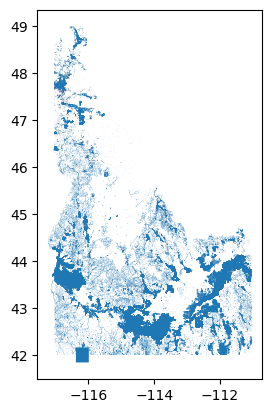

In [31]:
# plot shape info to map
gdfin1.plot()

In [32]:
# create output for Regulatory Area #1 dataframe
df = pd.DataFrame()

columnsList = ['in_SiteNativeID', 'geometry']
goutdf1 = pd.DataFrame(columns=columnsList, index=gdfin1.index)

goutdf1['in_SiteNativeID'] = gdfin1["in_SiteNativeID"].astype(str)
goutdf1['geometry'] = gdfin1['geometry']
goutdf1 = goutdf1.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False).reset_index(drop=True)

# drop geometery from outdf
outdf = outdf.drop(['in_Geometry'], axis=1)

print(len(goutdf1))
goutdf1.head()

215077


,in_SiteNativeID,geometry
0,POU2,"MULTIPOLYGON (((-113.09907 43.88546, -113.0940..."
1,POU7,"POLYGON ((-116.91055 43.52022, -116.91051 43.5..."
2,POU9,"POLYGON ((-116.175 43.58271, -116.17537 43.582..."
3,POU12,"POLYGON ((-113.5115 42.73474, -113.51641 42.73..."
4,POU15,"POLYGON ((-113.49018 42.73806, -113.49019 42.7..."


## Export Data

In [33]:
outdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482972 entries, 0 to 482971
Data columns (total 62 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   WaDEUUID                                      482972 non-null  object        
 1   in_MethodUUID                                 482972 non-null  object        
 2   in_VariableSpecificUUID                       482972 non-null  object        
 3   in_OrganizationUUID                           482972 non-null  object        
 4   in_GNISFeatureNameCV                          482972 non-null  object        
 5   in_WaterQualityIndicatorCV                    482972 non-null  object        
 6   in_WaterSourceName                            482972 non-null  object        
 7   in_WaterSourceNativeID                        482972 non-null  object        
 8   in_WaterSourceTypeCV                          482972 n

In [34]:
outdf

,WaDEUUID,in_MethodUUID,in_VariableSpecificUUID,in_OrganizationUUID,in_GNISFeatureNameCV,in_WaterQualityIndicatorCV,in_WaterSourceName,in_WaterSourceNativeID,in_WaterSourceTypeCV,in_CoordinateAccuracy,in_CoordinateMethodCV,in_County,in_EPSGCodeCV,in_GNISCodeCV,in_HUC12,in_HUC8,in_Latitude,in_Longitude,in_NHDNetworkStatusCV,in_NHDProductCV,in_PODorPOUSite,in_SiteName,in_SiteNativeID,in_SitePoint,in_SiteTypeCV,in_StateCV,in_USGSSiteID,in_AllocationApplicationDate,in_AllocationAssociatedConsumptiveUseSiteIDs,in_AllocationAssociatedWithdrawalSiteIDs,in_AllocationBasisCV,in_AllocationChangeApplicationIndicator,in_AllocationCommunityWaterSupplySystem,in_AllocationCropDutyAmount,in_AllocationExpirationDate,in_AllocationFlow_CFS,in_AllocationLegalStatusCV,in_AllocationNativeID,in_AllocationOwner,in_AllocationPriorityDate,in_AllocationSDWISIdentifierCV,in_AllocationTimeframeEnd,in_AllocationTimeframeStart,in_AllocationTypeCV,in_AllocationVolume_AF,in_BeneficialUseCategory,in_CommunityWaterSupplySystem,in_CropTypeCV,in_CustomerTypeCV,in_DataPublicationDate,in_DataPublicationDOI,in_ExemptOfVolumeFlowPriority,in_GeneratedPowerCapacityMW,in_IrrigatedAcreage,in_IrrigationMethodCV,in_LegacyAllocationIDs,in_OwnerClassificationCV,in_PopulationServed,in_PowerType,in_PrimaryBeneficialUseCategory,in_SDWISIdentifierCV,in_WaterAllocationNativeURL
0,idD0,IDwr_M1,IDwr_V1,IDwr_O1,,,Ground Water,wadeId1,Groundwater,,QQ,,4326,,,,43.69087,-116.41621,,,POD,,POD16,,,ID,,,,,License,,,,,0.19000,Active,63-10824,Maurice Mc Clue,1989-06-21,,,,,68.10000,"IRRIGATION, DOMESTIC",,,,,,0,,,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...
1,idD1,IDwr_M1,IDwr_V1,IDwr_O1,,,Spring,wadeId2,Groundwater,,QQ,,4326,,,,44.25431,-116.49047,,,POD,,POD122,,,ID,,,,,License,,,,,0.05000,Active,67-7744,Usdi Bureau Of Land Management Idaho State Office,1992-05-27,,,,,1.60000,"STOCKWATER, WILDLIFE",,,,,,0,,,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...
2,idD2,IDwr_M1,IDwr_V1,IDwr_O1,,,Ground Water,wadeId1,Groundwater,,QQ,,4326,,,,43.61613,-116.87410,,,POD,,POD160,,,ID,,,,,License,,,,,0.13000,Active,63-11206,James P Mertz,1990-02-28,,,,,1.30000,COMMERCIAL,,,,,,0,,,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...
3,idD3,IDwr_M1,IDwr_V1,IDwr_O1,,,Ground Water,wadeId1,Groundwater,,GPS - Downloaded,,4326,,,,42.76173,-114.79149,,,POD,,POD185,,,ID,,,,,License,,,,,1.20000,Active,36-8313A,Southfield Land Livestock Llc,1986-08-20,,,,,240.00000,IRRIGATION,,,,,,0,,,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...
4,idD4,IDwr_M1,IDwr_V1,IDwr_O1,,,Ground Water,wadeId1,Groundwater,,GPS - Downloaded,,4326,,,,42.76016,-114.79147,,,POD,,POD186,,,ID,,,,,License,,,,,1.20000,Active,36-8313A,Southfield Land Livestock Llc,1986-08-20,,,,,240.00000,IRRIGATION,,,,,,0,,,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482967,idU217138,IDwr_M1,IDwr_V1,IDwr_O1,,,Big Wood River,wadeId583,Surface Water,,Centroid,Wade Unspecified,4326,,,,43.34431,-114.29658,,,POU,,POU882087,,,ID,,,,,,,,,,,Active,37-22459,Heart Rock Ranch Llc,2010-01-19,,,,,,AESTHETIC STORAGE,,,,,,0,,0.00000,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...
482968,idU217139,IDwr_M1,IDwr_V1,IDwr_O1,,,Big Wood River,wadeId583,Surface Water,,Centroid,Wade Unspecified,4326,,,,43.48400,-114.27674,,,POU,,POU882488,,,ID,,,,,,,,,,,Active,37-23393,Eccles Window Rock Ranch Llc,1883-03-24,,,,,,MITIGATION,,,,,,0,,0.00000,,,,,,,,https://research.idwr.idaho.gov/apps/shared/Wr...
482969,idU217140,IDwr_M1,IDwr_V1,IDwr_O1,,,Ground Water,wadeId1,Groundwater,,Centroid,Wade Unspecified,4326,,,,44.73105,-116.04610,,,POU,,POU882882,,,ID,,,,,,,,,,,Active,65-23657,Long Valley Preservation Society,2016-05-23,,,,,,IRRIGATION,,,,,,0,,0.00000,,,,,,,,https://research.idwr.idaho.gov/a

In [35]:
# Export the output dataframe
# change output name / abbreviation to match native state provdier and wade data type 
outdf.to_csv('RawInputData/Pwr_Main.zip', compression=dict(method='zip', archive_name='Pwr_Main.csv'), index=False)  # The output, save as a zip
goutdf1.to_csv('RawInputData/P_Geometry.zip', compression=dict(method='zip', archive_name='P_Geometry.csv'), index=False)  # The output geometry.